# Введение в Машинное обучение

## Высшая Школа Цифровой Культуры

## Материалы к лекции 3. Логистическая регрессия

Обработка данных

In [1]:
#чтение данных, так как названия конфет уникальны, используем их в качестве индекса
import pandas as pd
DATA = pd.read_csv("candy-data.csv", delimiter=',', index_col='competitorname')

In [2]:
#обучение модели будем проводить на данных, за исключением некоторых конфет
train_data = DATA.drop(['100 Grand','3 Musketeers','One dime','One quarter','Air Heads'])

In [3]:
#отбор данных для предикторов, удаление дввух последних столбцов, индекс не включается в данные автоматически.
X = pd.DataFrame(train_data.drop(['winpercent', 'Y'], axis=1))

In [4]:
#отбор столбца для отклика
y = pd.DataFrame(train_data['Y'])

Обучение модели логистической регрессии

In [5]:
#подключение модели логистической регрессии из библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [6]:
#обучение модели
reg = LogisticRegression(random_state=2019, solver='lbfgs').fit(X, y.values.ravel())

Предсказание результатов с помощью обученной модели

In [7]:
#предсказание для сладости, введенной вручную, вероятности указаны для классов 0 и 1 соответственно 
reg.predict_proba([[1, 1, 1, 0, 0, 1, 1, 1, 0, 0.64, 0.76]])

array([[0.16929823, 0.83070177]])

In [8]:
#предсказание для сладости из таблицы
#выбор строки из таблицы
AirHeads = DATA.loc['Air Heads',:].to_frame().T
#отбор данных для предикторов и предсказание
reg.predict(AirHeads.drop(['winpercent', 'Y'], axis=1))

array([0])

Оценка модели с помощью тестовых данных

In [9]:
#чтение тестовых данных и отбор предикторов
test_data = pd.read_csv("candy-test.csv", delimiter=',', index_col='competitorname')
X_test = pd.DataFrame(test_data.drop(['Y'], axis=1))

In [10]:
#предсказание с помощью обученной модели, порог отсечения по умолчанию составляет 0.5
Y_pred = reg.predict(X_test)

In [11]:
Y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [12]:
#вероятности отнесения к 0 и 1 классу объектов тестовых данных соответствнно
Y_pred_probs = reg.predict_proba(X_test)

In [13]:
Y_pred_probs

array([[0.72311341, 0.27688659],
       [0.66492117, 0.33507883],
       [0.66530382, 0.33469618],
       [0.64424243, 0.35575757],
       [0.2817487 , 0.7182513 ],
       [0.3187884 , 0.6812116 ],
       [0.31177263, 0.68822737],
       [0.236561  , 0.763439  ],
       [0.65296892, 0.34703108],
       [0.64227911, 0.35772089],
       [0.66110745, 0.33889255],
       [0.84950158, 0.15049842],
       [0.65443869, 0.34556131],
       [0.40934211, 0.59065789],
       [0.28409362, 0.71590638]])

In [14]:
#отбор вероятностей отнесения объектов к классу 1
Y_pred_probs_class_1 = Y_pred_probs[:, 1]

In [15]:
Y_pred_probs_class_1

array([0.27688659, 0.33507883, 0.33469618, 0.35575757, 0.7182513 ,
       0.6812116 , 0.68822737, 0.763439  , 0.34703108, 0.35772089,
       0.33889255, 0.15049842, 0.34556131, 0.59065789, 0.71590638])

In [16]:
#отбор отклика Y из тестовых данных и преобразование в массив
Y_true = (test_data['Y'].to_frame().T).values.ravel()

In [17]:
Y_true

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [18]:
#подключение библиотеки для вычисления метрик
from sklearn import metrics

In [19]:
fpr, tpr, _ = metrics.roc_curve(Y_true, Y_pred)

In [20]:
#вычисляем AUC
metrics.roc_auc_score(Y_true, Y_pred_probs_class_1)

0.8799999999999999

In [21]:
#вычисление Recall
metrics.recall_score(Y_true, Y_pred)

0.6

In [22]:
#вычисление Precision
metrics.precision_score(Y_true, Y_pred)

0.5

In [23]:
#подключим библиотеки для визуализации
import matplotlib.pyplot as plt
%matplotlib inline

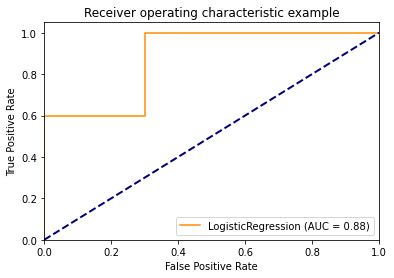

In [24]:
metrics.plot_roc_curve(reg, X_test, Y_true, color='darkorange') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.show()